##  <p align="center"> National & International Economic Insight & EDA Project </p>

<p align="center"> Cohort-A Econ | End-of-Phase Team Project </p>

# 📘 Data Dictionary: us_econ.csv

| Column Name                                   | Description                                                                 |
|-----------------------------------------------|-----------------------------------------------------------------------------|
| `DATE`                                        | Monthly timestamp (2007–2025)                                               |
| `YEAR`                                        | Calendar year extracted from DATE                                           |
| `MONTH`                                       | Calendar month as a number (1–12)                                           |
| `MONTH_NAME`                                  | Calendar month as text (e.g., Jan, Feb)                                     |
| `QUARTER`                                     | Fiscal quarter for each date (e.g., Q1, Q2)                                 |
| `QUARTER_LABEL`                               | Label combining quarter and year (e.g., Q1 - 2007)                          |
| `Disposable_Personal_Income_Nominal`          | Total post-tax income (billions, current dollars, not inflation-adjusted)  |
| `Disposable_Personal_Income_Per_Capita`       | Post-tax income per person (chained 2017 dollars)                           |
| `Real_Personal_Consumption_Expenditures`      | Inflation-adjusted consumer spending (billions, chained 2017 dollars)       |
| `Total_Personal_Income`                       | Total pre-tax personal income (billions of dollars)                         |
| `RPCE_rolling`                                | 6-month rolling average of real consumption (created in notebook)          |
| `Spending_Efficiency`                         | Ratio of real spending to income (RPCE ÷ DPI)                              |


# 📊 Analytical Questions We’ll Explore

1. 📈 How has Real Personal Consumption Expenditures changed over time?
2. 📉 How evenly is spending distributed? Are there spikes or slumps in the data?
3. 🔁 Does higher income always lead to higher real consumption?
4. 📦 Do spending habits show seasonal or quarterly patterns?
5. 📊 How has the ratio of spending to income changed over time?
6. 🧯 Did consumption collapse or persist during major recessions?
7. 📘 What does this tell us about U.S. economic behavior and resilience?


In [69]:
# Import Exploratory Libraries
import pandas as pd # for data manipulation using DataFrames
import numpy as np # for numerical operations
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import matplotlib.ticker as xlocator # for axis formatting customizing axis tick locations and formatting in matplotlib plots
import plotly.express as px # for interactive plots  (especially scatter, line, and map plots)
from scipy.stats import pearsonr # for calculating the Pearson correlation coefficient between two datasets   
from scipy.stats import zscore    
import math # for mathematical operations not found in numpy or native python mathematical functions like log, sqrt, floor, ceil, et
import geopandas as gpd # For working with geospatial data in pandas-like DataFrames
import geoplot.crs as gcrs  # Coordinate reference systems used with geoplot for geospatial plotting
import geoplot as gplt # High-level geospatial plotting built on top of geopandas and matplotlib
import cartopy.crs as ccrs #For advanced cartographic projections and coordinate transformations
from pypalettes import add_cmap # Allows custom color maps for plotting (useful for themed or branded maps)
from pyfonts import load_google_font # To import and use Google Fonts in matplotlib visualizations
#import unicodedata #for normalizing or inspecting Unicode text data (e.g., removing accents or categorizing characters)
import matplotlib.pyplot as plt
plt.style.use("default")  # Restores the light theme
import warnings
warnings.filterwarnings("ignore")


In [70]:
# import US Macro/Micro Index data csv
us_econ = pd.read_csv("../data/US_macro_micro_index.csv")

In [71]:
# unfiltered data 
us_econ

,Unnamed: 0,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
0,0,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1
1,1,2007-02-01,2007,2,Feb,Q1,10265.8,39906,11178.2,11734.2
2,2,2007-03-01,2007,3,Mar,Q1,10337.0,40007,11190.7,11821.4
3,3,2007-04-01,2007,4,Apr,Q2,10376.5,40037,11201.5,11868.1
4,4,2007-05-01,2007,5,May,Q2,10412.7,40029,11218.0,11908.7
...,...,...,...,...,...,...,...,...,...,...
214,214,2024-11-01,2024,11,Nov,Q4,21883.6,51565,16267.2,24993.2
215,215,2024-12-01,2024,12,Dec,Q4,21965.2,51581,16357.7,25080.6
216,216,2025-01-01,2025,1,Jan,Q1,22083.8,51648,16296.2,25232.8
217,217,2025-02-01,2025,2,Feb,Q1,22259.7,51809,16313.2,25420.9


In [72]:
# first 5 rows of data
us_econ.head()

,Unnamed: 0,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
0,0,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1
1,1,2007-02-01,2007,2,Feb,Q1,10265.8,39906,11178.2,11734.2
2,2,2007-03-01,2007,3,Mar,Q1,10337.0,40007,11190.7,11821.4
3,3,2007-04-01,2007,4,Apr,Q2,10376.5,40037,11201.5,11868.1
4,4,2007-05-01,2007,5,May,Q2,10412.7,40029,11218.0,11908.7


In [73]:
# last 5 rows of data
us_econ.tail()

,Unnamed: 0,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
214,214,2024-11-01,2024,11,Nov,Q4,21883.6,51565,16267.2,24993.2
215,215,2024-12-01,2024,12,Dec,Q4,21965.2,51581,16357.7,25080.6
216,216,2025-01-01,2025,1,Jan,Q1,22083.8,51648,16296.2,25232.8
217,217,2025-02-01,2025,2,Feb,Q1,22259.7,51809,16313.2,25420.9
218,218,2025-03-01,2025,3,Mar,Q1,22361.7,52047,16427.3,25537.8


In [74]:
# number of rows and columns
us_econ.shape

(219, 10)

In [75]:
# describe numberic columns
us_econ.describe()

,Unnamed: 0,YEAR,MONTH,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,109.000000,2015.630137,6.438356,14772.744749,44706.808219,13050.686301,16795.313699
std,63.364028,5.281542,3.477264,3505.535636,4349.818062,1622.176393,4090.909736
min,0.000000,2007.000000,1.000000,10200.400000,39579.000000,11068.000000,11647.100000
25%,54.500000,2011.000000,3.000000,11917.350000,40812.500000,11538.800000,13388.050000
50%,109.000000,2016.000000,6.000000,13773.800000,43487.000000,12777.300000,15695.900000
75%,163.500000,2020.000000,9.000000,17577.750000,48418.500000,14073.000000,19812.400000
max,218.000000,2025.000000,12.000000,22361.700000,61570.000000,16427.300000,25537.800000


In [76]:
# field mappings
us_econ.columns


Index(['Unnamed: 0', 'DATE', 'YEAR', 'MONTH', 'MONTH_NAME', 'QUARTER',
       'Disposable_Personal_Income_Nominal',
       'Disposable_Personal_Income_Per_Capita',
       'Real_Personal_Consumption_Expenditures', 'Total_Personal_Income'],
      dtype='object')

In [77]:
us_econ.isnull().sum()


Unnamed: 0                                0
DATE                                      0
YEAR                                      0
MONTH                                     0
MONTH_NAME                                0
QUARTER                                   0
Disposable_Personal_Income_Nominal        0
Disposable_Personal_Income_Per_Capita     0
Real_Personal_Consumption_Expenditures    0
Total_Personal_Income                     0
dtype: int64

In [78]:
# Check for fully empty rows
us_econ[us_econ.isnull().all(axis=1)]

,Unnamed: 0,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income


In [79]:
# Check for duplicate rows
us_econ.duplicated().sum()

np.int64(0)

In [80]:
us_econ.drop(columns=["Unnamed: 0"], inplace=True)

In [81]:
us_econ

,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
0,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1
1,2007-02-01,2007,2,Feb,Q1,10265.8,39906,11178.2,11734.2
2,2007-03-01,2007,3,Mar,Q1,10337.0,40007,11190.7,11821.4
3,2007-04-01,2007,4,Apr,Q2,10376.5,40037,11201.5,11868.1
4,2007-05-01,2007,5,May,Q2,10412.7,40029,11218.0,11908.7
...,...,...,...,...,...,...,...,...,...
214,2024-11-01,2024,11,Nov,Q4,21883.6,51565,16267.2,24993.2
215,2024-12-01,2024,12,Dec,Q4,21965.2,51581,16357.7,25080.6
216,2025-01-01,2025,1,Jan,Q1,22083.8,51648,16296.2,25232.8
217,2025-02-01,2025,2,Feb,Q1,22259.7,51809,16313.2,25420.9


In [82]:
us_econ.dtypes

DATE                                       object
YEAR                                        int64
MONTH                                       int64
MONTH_NAME                                 object
QUARTER                                    object
Disposable_Personal_Income_Nominal        float64
Disposable_Personal_Income_Per_Capita       int64
Real_Personal_Consumption_Expenditures    float64
Total_Personal_Income                     float64
dtype: object

In [83]:
us_econ.info


<bound method DataFrame.info of            DATE  YEAR  MONTH MONTH_NAME QUARTER  \
0    2007-01-01  2007      1        Jan      Q1   
1    2007-02-01  2007      2        Feb      Q1   
2    2007-03-01  2007      3        Mar      Q1   
3    2007-04-01  2007      4        Apr      Q2   
4    2007-05-01  2007      5        May      Q2   
..          ...   ...    ...        ...     ...   
214  2024-11-01  2024     11        Nov      Q4   
215  2024-12-01  2024     12        Dec      Q4   
216  2025-01-01  2025      1        Jan      Q1   
217  2025-02-01  2025      2        Feb      Q1   
218  2025-03-01  2025      3        Mar      Q1   

     Disposable_Personal_Income_Nominal  \
0                               10200.4   
1                               10265.8   
2                               10337.0   
3                               10376.5   
4                               10412.7   
..                                  ...   
214                             21883.6   
215        

In [84]:
us_econ.describe()

,YEAR,MONTH,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2015.630137,6.438356,14772.744749,44706.808219,13050.686301,16795.313699
std,5.281542,3.477264,3505.535636,4349.818062,1622.176393,4090.909736
min,2007.000000,1.000000,10200.400000,39579.000000,11068.000000,11647.100000
25%,2011.000000,3.000000,11917.350000,40812.500000,11538.800000,13388.050000
50%,2016.000000,6.000000,13773.800000,43487.000000,12777.300000,15695.900000
75%,2020.000000,9.000000,17577.750000,48418.500000,14073.000000,19812.400000
max,2025.000000,12.000000,22361.700000,61570.000000,16427.300000,25537.800000


##	Chart Types	Stats

🧠 Quick Refresher on the Story Structure:
Chapter	Purpose	Type of Analysis	Questions it covers
## Intro	Show broad trends in consumption behavior	Univariate	Q1 (RPCE over time), Q2 (Income vs RPCE)
1.	How has Real Personal Consumption Expenditures changed over time?	Line, Rolling Avg, Histogram	Z-score
2.	How evenly is spending distributed? Are there spikes or slumps in the data?	Histogram, KDE, Boxplot	Z-score

## Tension	Compare variables to spot stress or correlation	Bivariate / Multivariate	Q3 (Income → Spending)
3.	Does higher income always lead to higher real spending?	Scatter, Regression	Pearson r, p-value, z-score

## Climax	Surface seasonal/cyclical or behavioral anomalies	Boxplots, Violin, Heatmaps	Q4, Q5
4.	Do spending habits show seasonal or quarterly patterns?	Boxplot, Violin, Heatmap	None (visual story)
5.	How has the ratio of spending to income changed over time?	Line (Spending Efficiency), Area chart, Histogram	Optional z-score

## Conclusion	Test resilience during crisis / extract insight	Composite analysis	Q6, Q7 (Recessions & Big Picture)
6.	Did real consumption collapse or persist during major recessions?	Overlay line, Annotations, Shaded bands	Optional
7.  What does this tell us about U.S. economic behavior and resilience?

## 📖 Story Chapter: Introduction (Macro)
We begin with broad national trends in consumer spending (RPCE). This phase sets the stage for understanding the economy’s behavior over time by establishing foundational patterns — what’s happening with income and spending on a broad level before digging into when, how, or why things shift.

## ❓ Question 1: How has Real Personal Consumption Expenditures changed over time?
Chart Class: Univariate

Chart Type: Line Chart (with 6-Month Rolling Average)

Purpose: Show long-term consumption trends and highlight behavior around recessions.

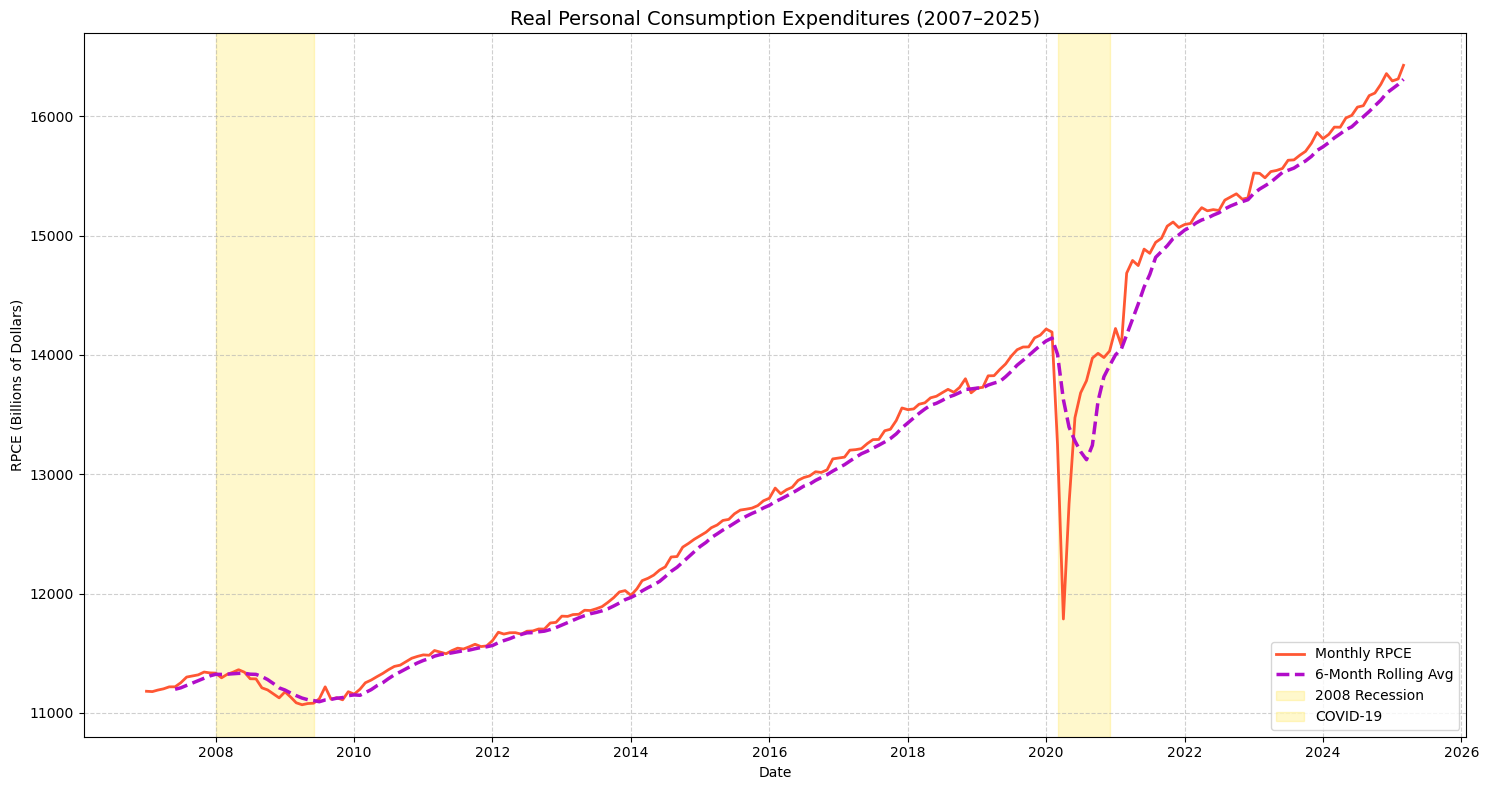

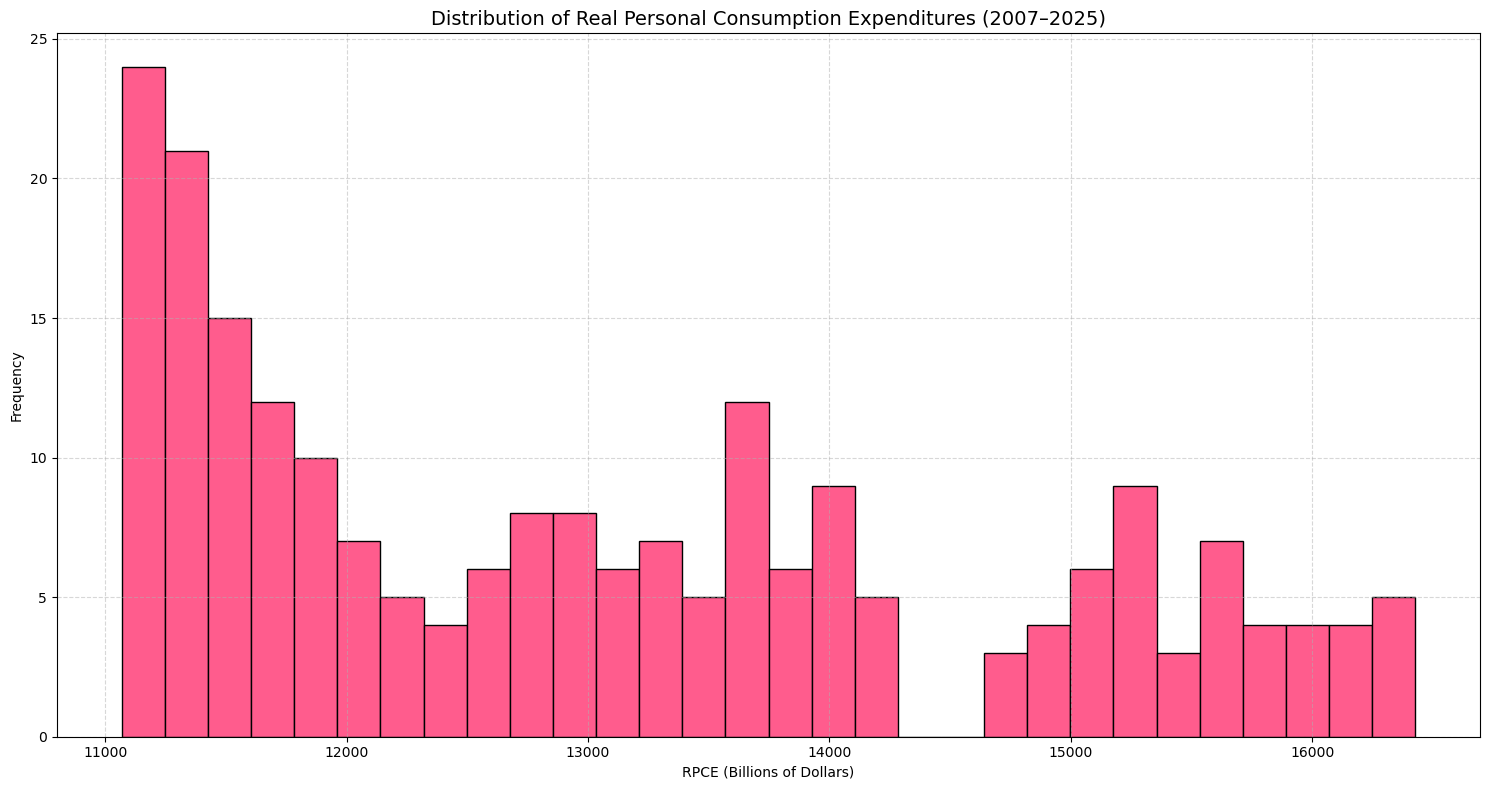

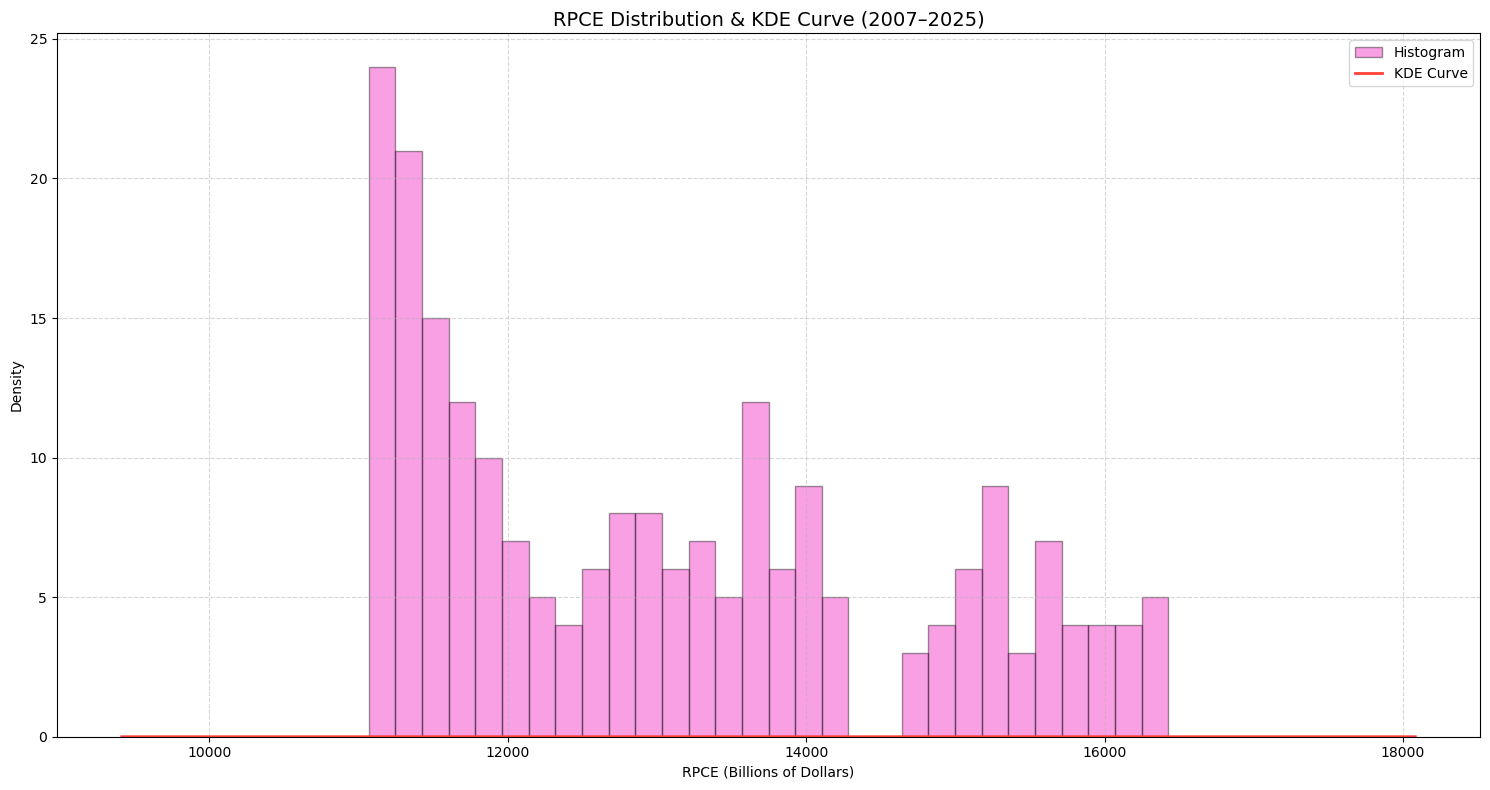

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Reload the dataset and prepare columns
us_econ = pd.read_csv("../data/US_macro_micro_index.csv")
us_econ['DATE'] = pd.to_datetime(us_econ['DATE'])
us_econ['RPCE_rolling'] = us_econ['Real_Personal_Consumption_Expenditures'].rolling(6).mean()

# Chart 1 (Combined version of previous 1A and 1B with recession bands)
plt.figure(figsize=(15, 8))
plt.plot(us_econ['DATE'], us_econ['Real_Personal_Consumption_Expenditures'],
         color='#FF5733', linewidth=2, label='Monthly RPCE')
plt.plot(us_econ['DATE'], us_econ['RPCE_rolling'],
         color='#B10DC9', linewidth=2.5, linestyle='--', label='6-Month Rolling Avg')
plt.axvspan(pd.to_datetime('2008-01-01'), pd.to_datetime('2009-06-01'),
            color='#FFDC00', alpha=0.2, label='2008 Recession')
plt.axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2020-12-01'),
            color='#FFDC00', alpha=0.2, label='COVID-19')
plt.title('Real Personal Consumption Expenditures (2007–2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('RPCE (Billions of Dollars)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Histogram of RPCE
plt.figure(figsize=(15, 8))
plt.hist(us_econ['Real_Personal_Consumption_Expenditures'],
         bins=30, color='#FF5C8D', edgecolor='black')
plt.title('Distribution of Real Personal Consumption Expenditures (2007–2025)', fontsize=14)
plt.xlabel('RPCE (Billions of Dollars)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# KDE plot + Histogram overlay
plt.figure(figsize=(15, 8))
plt.hist(us_econ['Real_Personal_Consumption_Expenditures'],
         bins=30, color='#F012BE', edgecolor='black', alpha=0.4, label='Histogram')
sns.kdeplot(us_econ['Real_Personal_Consumption_Expenditures'],
            color='#FF4136', linewidth=2, label='KDE Curve')
plt.title('RPCE Distribution & KDE Curve (2007–2025)', fontsize=14)
plt.xlabel('RPCE (Billions of Dollars)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## ❓ Question 2: Does higher disposable income always lead to higher real consumption?


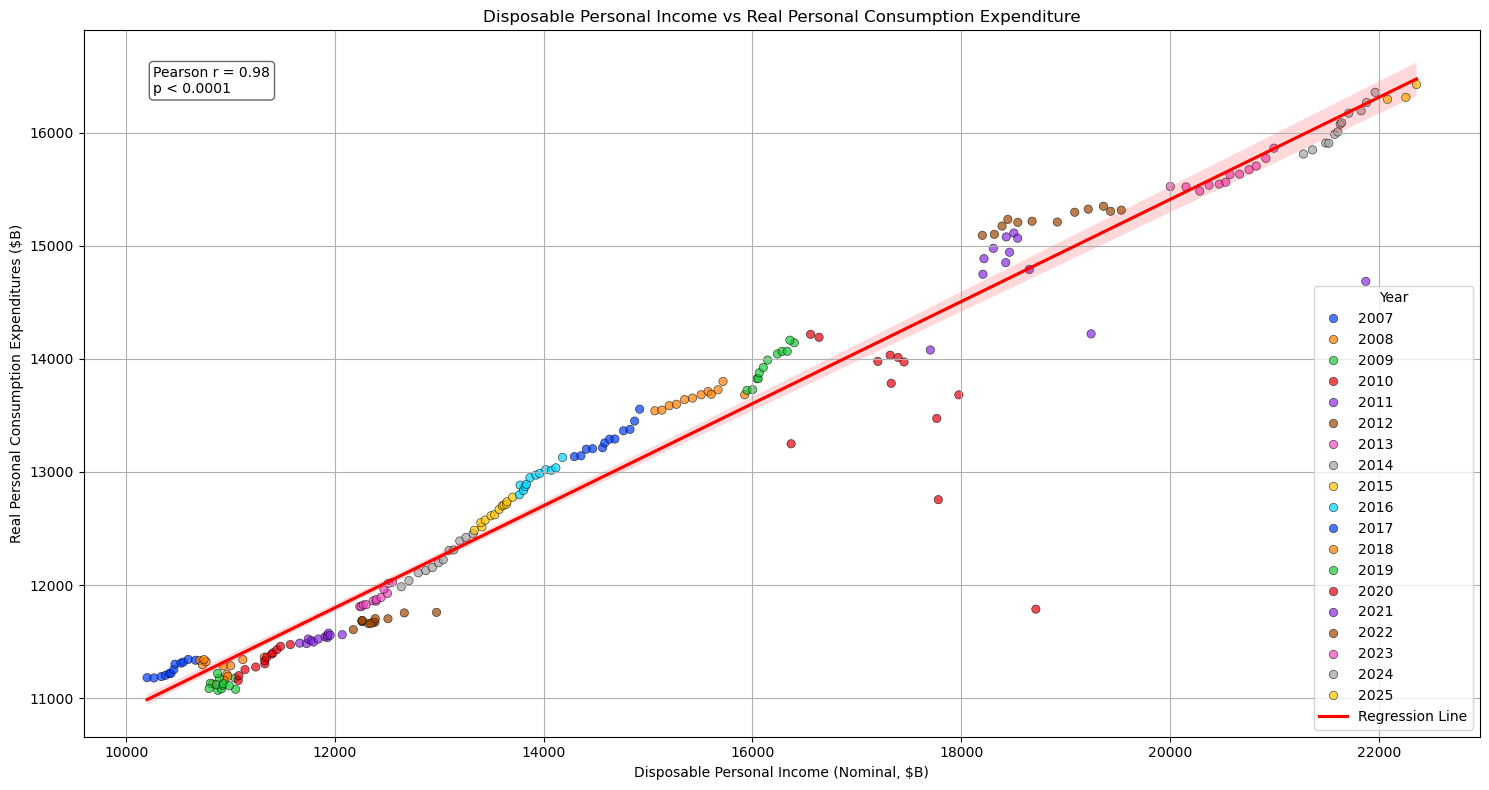

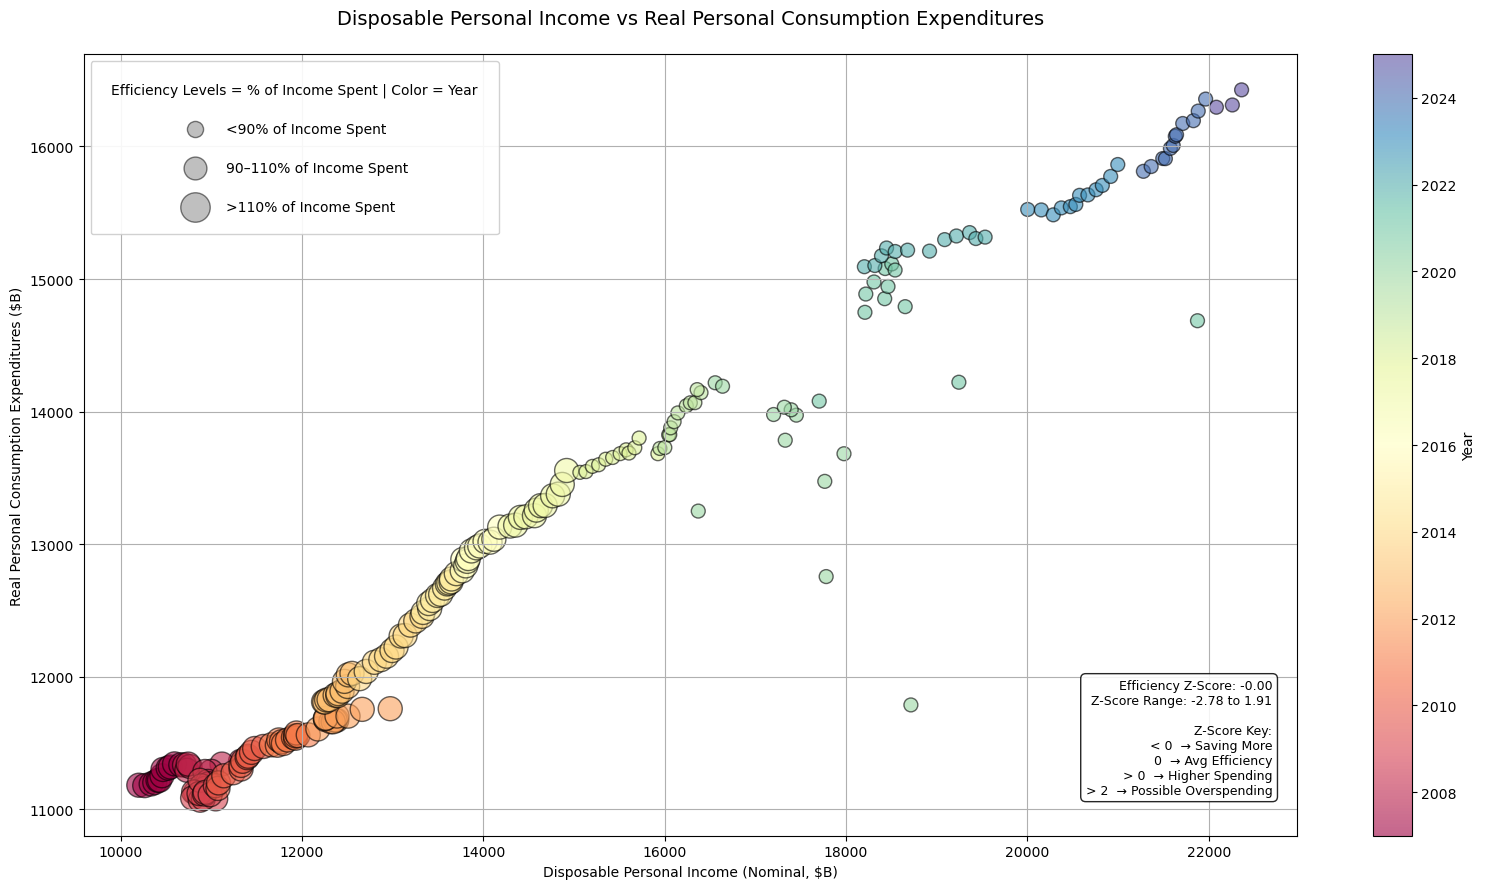

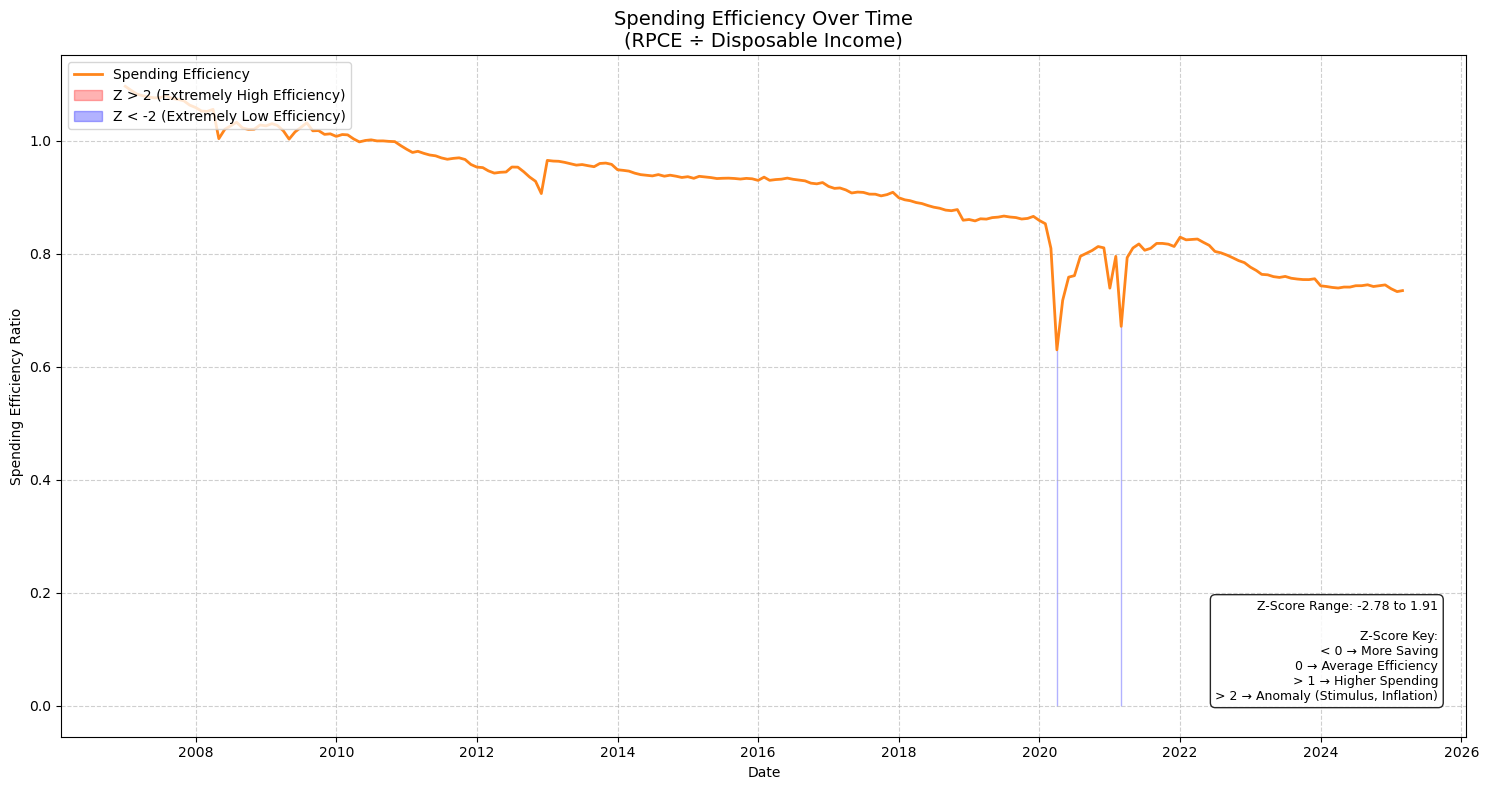

In [86]:
# Relationship Between Income and RPCE (Spending) to Examine correlation and efficiency of spending relative to income - Measures strength of correlation between income and consumption
# Chart Class: Bivariate → Multivariate

# Disposable Income with Regression Line 
fig, ax1 = plt.subplots(figsize=(15, 8))

sns.scatterplot(
    data=us_econ,
    x='Disposable_Personal_Income_Nominal',
    y='Real_Personal_Consumption_Expenditures',
    hue='YEAR',
    palette='bright',
    edgecolor='black',
    alpha=0.7,
    ax=ax1
)

sns.regplot(
    data=us_econ,
    x='Disposable_Personal_Income_Nominal',
    y='Real_Personal_Consumption_Expenditures',
    scatter=False,
    color='red',
    ax=ax1,
    label='Regression Line'
)

# Annotate correlation results
text = f"Pearson r = 0.98\np < 0.0001"
ax1.text(0.05, 0.95, text, transform=ax1.transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.6))

ax1.set_title("Disposable Personal Income vs Real Personal Consumption Expenditure")
ax1.set_xlabel("Disposable Personal Income (Nominal, $B)")
ax1.set_ylabel("Real Personal Consumption Expenditures ($B)")
ax1.legend(title='Year')
ax1.grid(True)
plt.tight_layout()
plt.show()


# Spending efficiency and Z-score
us_econ['Spending_Efficiency'] = us_econ['Real_Personal_Consumption_Expenditures'] / us_econ['Disposable_Personal_Income_Nominal']
us_econ['Efficiency_Z'] = zscore(us_econ['Spending_Efficiency'])

# Categorize spending efficiency for bubble sizes
def categorize_eff(val):
    if val < 0.9:
        return 'Low (<90% Spent)'
    elif 0.9 <= val <= 1.1:
        return 'Medium (90–110% Spent)'
    else:
        return 'High (>110% Spent)'
us_econ['Efficiency_Category'] = us_econ['Spending_Efficiency'].apply(categorize_eff)

size_map = {
    'Low (<90% Spent)': 100,
    'Medium (90–110% Spent)': 300,
    'High (>110% Spent)': 600
}
us_econ['Bubble_Size'] = us_econ['Efficiency_Category'].map(size_map)

# Chart
fig, ax = plt.subplots(figsize=(16.2, 9))
bubble = ax.scatter(
    us_econ['Disposable_Personal_Income_Nominal'],
    us_econ['Real_Personal_Consumption_Expenditures'],
    s=us_econ['Bubble_Size'],
    c=us_econ['YEAR'],
    cmap='Spectral',
    alpha=0.6,
    edgecolor='black'
)

# Colorbar for year
cbar = plt.colorbar(bubble, ax=ax)
cbar.set_label("Year")

# Bubble size legend (Top Left – smaller bubbles, cleaner layout)
handles = [
    plt.scatter([], [], s=60, color='gray', alpha=0.5, edgecolor='black'),
    plt.scatter([], [], s=120, color='gray', alpha=0.5, edgecolor='black'),
    plt.scatter([], [], s=200, color='gray', alpha=0.5, edgecolor='black')
]
labels = [
    '<90% of Income Spent',
    '90–110% of Income Spent',
    '>110% of Income Spent'
]

legend = ax.legend(
    handles=handles,
    labels=labels,
    title="Efficiency Levels = % of Income Spent | Color = Year",
    loc='upper left',
    frameon=True,
    markerscale=1.5,
    labelspacing=1.8,
    borderpad=1.5,
    handletextpad=1.2
)
legend.get_frame().set_alpha(0.9)


# Z-score box (Bottom Right)
z_text = (
    f"Efficiency Z-Score: {us_econ['Efficiency_Z'].mean():.2f}\n"
    f"Z-Score Range: {us_econ['Efficiency_Z'].min():.2f} to {us_econ['Efficiency_Z'].max():.2f}\n\n"
    "Z-Score Key:\n"
    "< 0  → Saving More\n"
    "  0  → Avg Efficiency\n"
    "> 0  → Higher Spending\n"
    "> 2  → Possible Overspending"
)
ax.text(0.98, 0.05, z_text, transform=ax.transAxes,
        fontsize=9, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black", alpha=0.85))

# Labels and grid
ax.set_title("Disposable Personal Income vs Real Personal Consumption Expenditures\n", fontsize=14)
ax.set_xlabel("Disposable Personal Income (Nominal, $B)")
ax.set_ylabel("Real Personal Consumption Expenditures ($B)")
ax.grid(True)
plt.tight_layout()
plt.show()

# Calculate Spending Efficiency and Z-scores
us_econ['Spending_Efficiency'] = us_econ['Real_Personal_Consumption_Expenditures'] / us_econ['Disposable_Personal_Income_Nominal']
us_econ['Efficiency_Z'] = zscore(us_econ['Spending_Efficiency'])

#  Chart 2C
fig, ax = plt.subplots(figsize=(15, 8))

# Main efficiency line
ax.plot(
    us_econ['DATE'],
    us_econ['Spending_Efficiency'],
    label='Spending Efficiency',
    color='#FF851B',
    linewidth=2
)

# Highlight anomalies based on Z-score
ax.fill_between(
    us_econ['DATE'],
    us_econ['Spending_Efficiency'],
    where=(us_econ['Efficiency_Z'] > 2),
    color='red',
    alpha=0.3,
    label='Z > 2 (Extremely High Efficiency)'
)
ax.fill_between(
    us_econ['DATE'],
    us_econ['Spending_Efficiency'],
    where=(us_econ['Efficiency_Z'] < -2),
    color='blue',
    alpha=0.3,
    label='Z < -2 (Extremely Low Efficiency)'
)

# Annotate with Z-score summary box (bottom-right)
z_text = (
    f"Z-Score Range: {us_econ['Efficiency_Z'].min():.2f} to {us_econ['Efficiency_Z'].max():.2f}\n\n"
    "Z-Score Key:\n"
    "< 0 → More Saving\n"
    "  0 → Average Efficiency\n"
    "> 1 → Higher Spending\n"
    "> 2 → Anomaly (Stimulus, Inflation)"
)
ax.text(
    0.98, 0.05, z_text,
    transform=ax.transAxes,
    fontsize=9,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black", alpha=0.85)
)

# Final labels
ax.set_title("Spending Efficiency Over Time\n(RPCE ÷ Disposable Income)", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Spending Efficiency Ratio")
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 📖 Story Chapter: 🔀 Tension Phase: Comparing RPCE and Income 

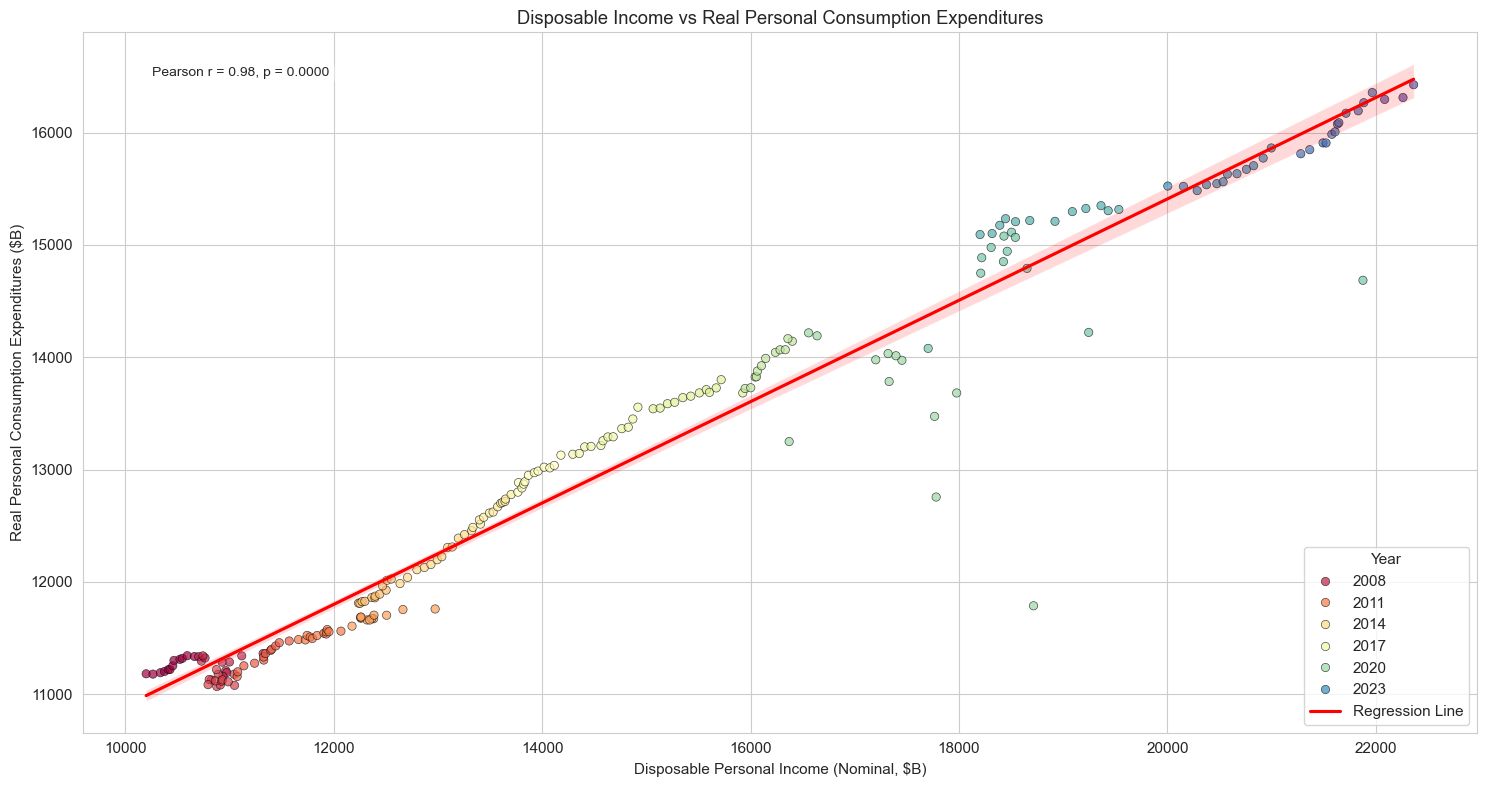

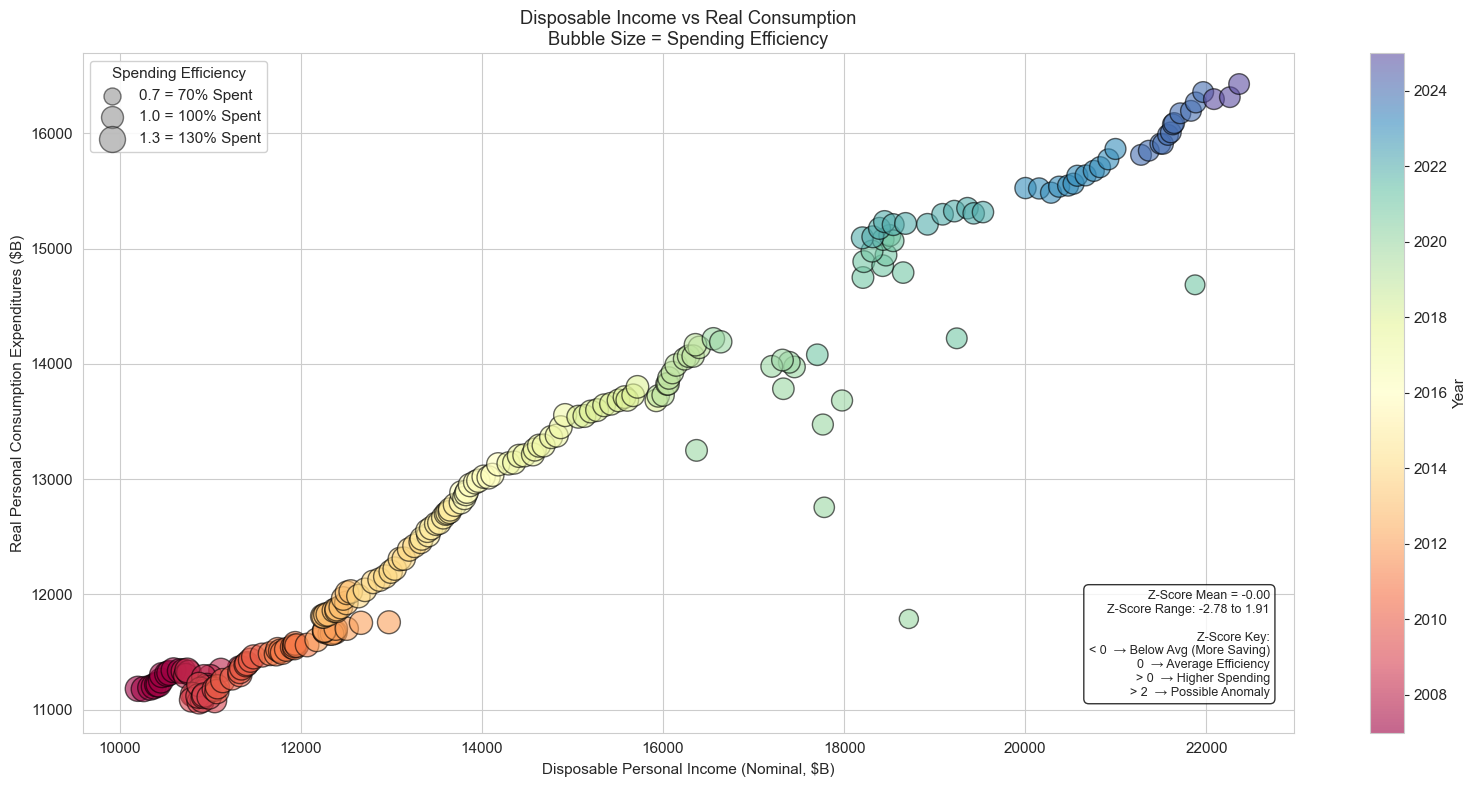

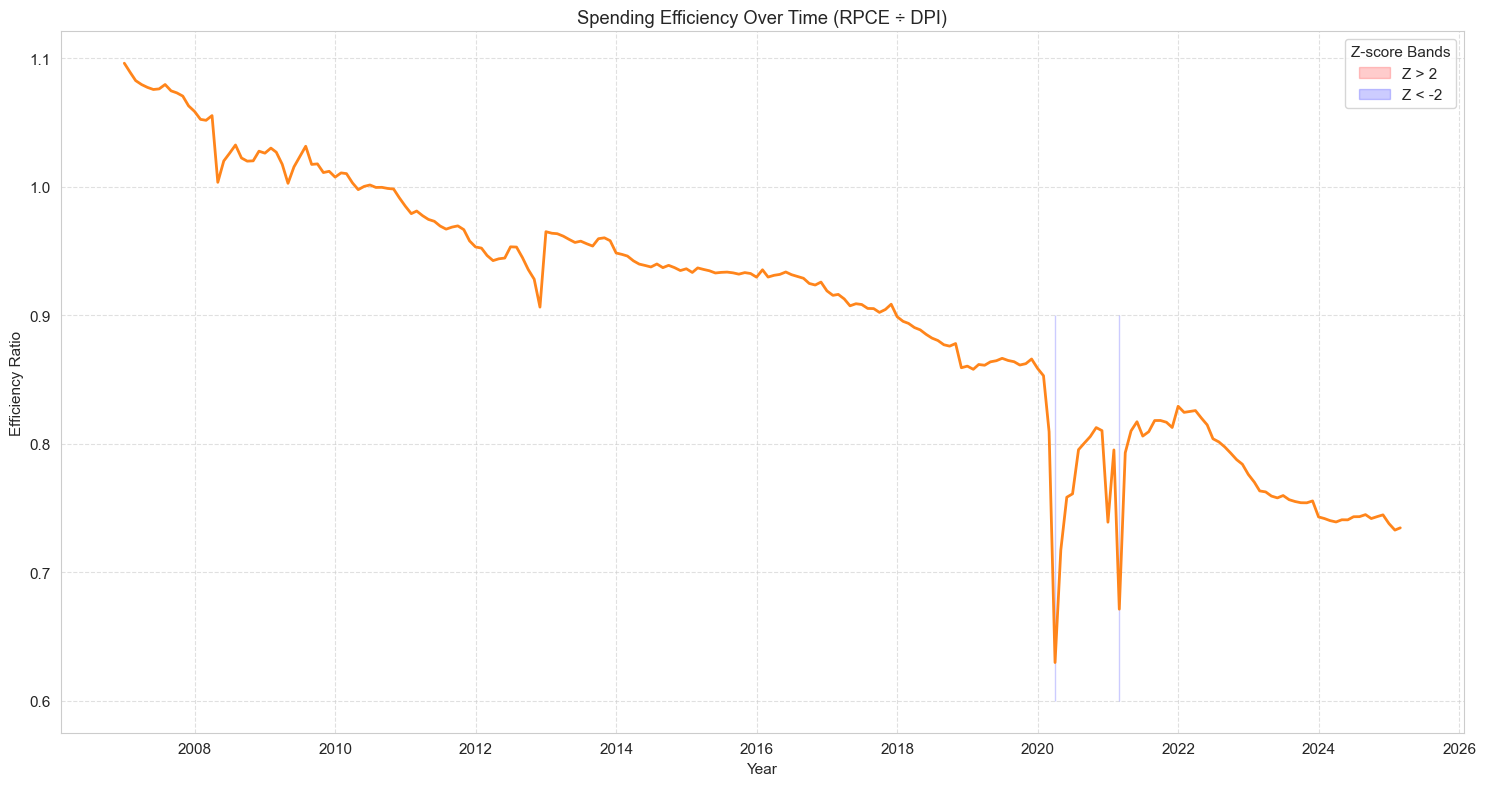

In [99]:
# Chart 3A — Scatter Plot with Regression Line
# Chart Type: Bivariate Scatter + Trendline
# Purpose: Show direct relationship between income and consumption

fig, ax1 = plt.subplots(figsize=(15, 8))
sns.scatterplot(
    data=us_econ,
    x='Disposable_Personal_Income_Nominal',
    y='Real_Personal_Consumption_Expenditures',
    hue='YEAR',
    palette='Spectral',
    edgecolor='black',
    alpha=0.7,
    ax=ax1
)
sns.regplot(
    data=us_econ,
    x='Disposable_Personal_Income_Nominal',
    y='Real_Personal_Consumption_Expenditures',
    scatter=False,
    color='red',
    ax=ax1,
    label='Regression Line'
)
r, p = pearsonr(us_econ['Disposable_Personal_Income_Nominal'], us_econ['Real_Personal_Consumption_Expenditures'])
text = f"Pearson r = {r:.2f}, p = {p:.4f}"
ax1.text(0.05, 0.95, text, transform=ax1.transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.6))
ax1.set_title("Disposable Income vs Real Personal Consumption Expenditures")
ax1.set_xlabel("Disposable Personal Income (Nominal, $B)")
ax1.set_ylabel("Real Personal Consumption Expenditures ($B)")
ax1.legend(title='Year')
ax1.grid(True)
plt.tight_layout()
plt.show()

# Chart 3B — Bubble Plot with Spending Efficiency (Multivariate)
# Chart Type: Bubble Chart
# Purpose: Add Spending Efficiency to the mix

us_econ['Spending_Efficiency'] = us_econ['Real_Personal_Consumption_Expenditures'] / us_econ['Disposable_Personal_Income_Nominal']
us_econ['Bubble_Size'] = us_econ['Spending_Efficiency'] * 300
eff_z = zscore(us_econ['Spending_Efficiency'])

fig, ax2 = plt.subplots(figsize=(16.2, 8))
bubble = ax2.scatter(
    us_econ['Disposable_Personal_Income_Nominal'],
    us_econ['Real_Personal_Consumption_Expenditures'],
    s=us_econ['Bubble_Size'],
    c=us_econ['YEAR'],
    cmap='Spectral',
    alpha=0.6,
    edgecolor='black'
)

cbar = plt.colorbar(bubble, ax=ax2)
cbar.set_label("Year")

# Bubble Size Key
for size, label in zip([150, 250, 350], ['0.7 = 70% Spent', '1.0 = 100% Spent', '1.3 = 130% Spent']):
    ax2.scatter([], [], s=size, color='gray', alpha=0.5, edgecolor='black', label=label)
bubble_legend = ax2.legend(loc='upper left', title='Spending Efficiency', frameon=True)
bubble_legend.get_frame().set_alpha(0.9)

# Z-score annotation
z_text = (
    f"Z-Score Mean = {eff_z.mean():.2f}\n"
    f"Z-Score Range: {eff_z.min():.2f} to {eff_z.max():.2f}\n\n"
    "Z-Score Key:\n"
    "< 0  → Below Avg (More Saving)\n"
    "  0  → Average Efficiency\n"
    "> 0  → Higher Spending\n"
    "> 2  → Possible Anomaly"
)
ax2.text(0.98, 0.05, z_text, transform=ax2.transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black", alpha=0.8))

ax2.set_title("Disposable Income vs Real Consumption\nBubble Size = Spending Efficiency")
ax2.set_xlabel("Disposable Personal Income (Nominal, $B)")
ax2.set_ylabel("Real Personal Consumption Expenditures ($B)")
ax2.grid(True)
plt.tight_layout()
plt.show()

# Chart 3C — Efficiency Over Time
# Chart Type: Line Plot
# Purpose: Show if Americans are spending more or less of their income over time

fig, ax3 = plt.subplots(figsize=(15, 8))
ax3.plot(us_econ['DATE'], us_econ['Spending_Efficiency'], color='#FF851B', linewidth=2)

# Highlight high/low efficiency bands
ax3.fill_between(us_econ['DATE'], 1.1, 1.4, where=(eff_z > 2), color='red', alpha=0.2, label='Z > 2')
ax3.fill_between(us_econ['DATE'], 0.6, 0.9, where=(eff_z < -2), color='blue', alpha=0.2, label='Z < -2')

ax3.set_title("Spending Efficiency Over Time (RPCE ÷ DPI)")
ax3.set_xlabel("Year")
ax3.set_ylabel("Efficiency Ratio")
ax3.legend(title='Z-score Bands')
ax3.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 📖 Story Chapter: 💥 Climax - Spending Efficiency by Income Tier

## 🔍 Question 4: Do spending habits show seasonal or quarterly patterns?

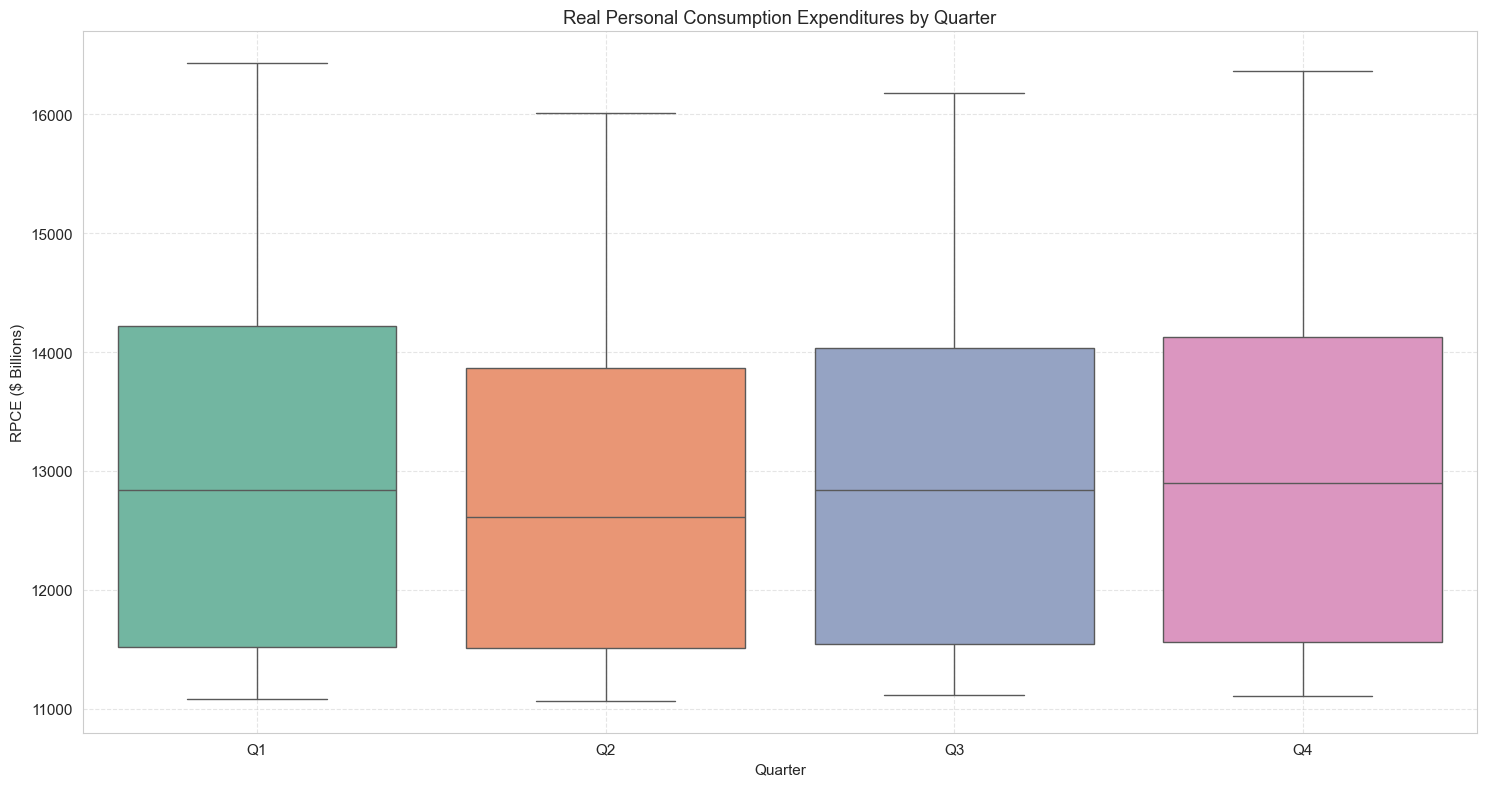

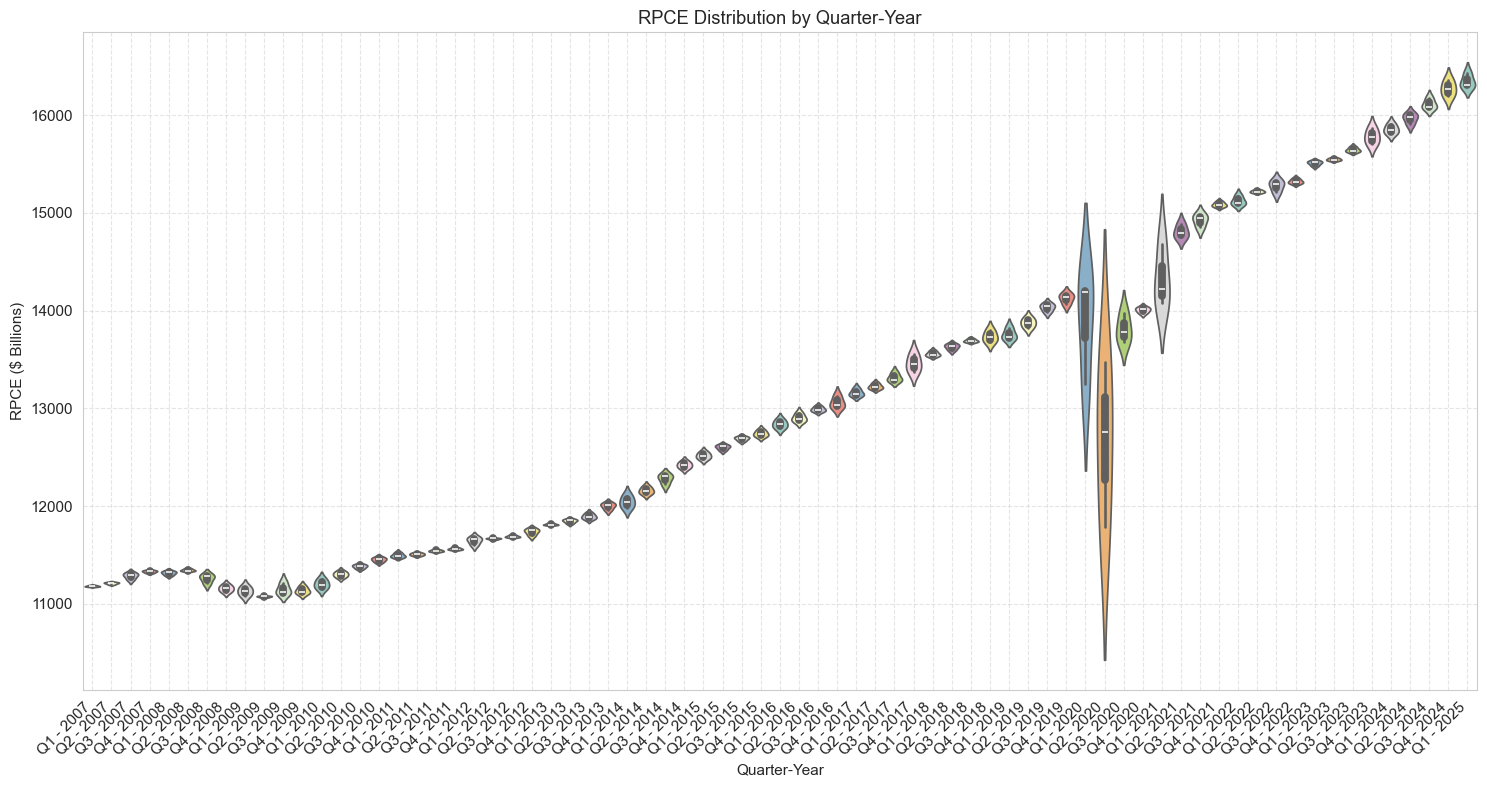

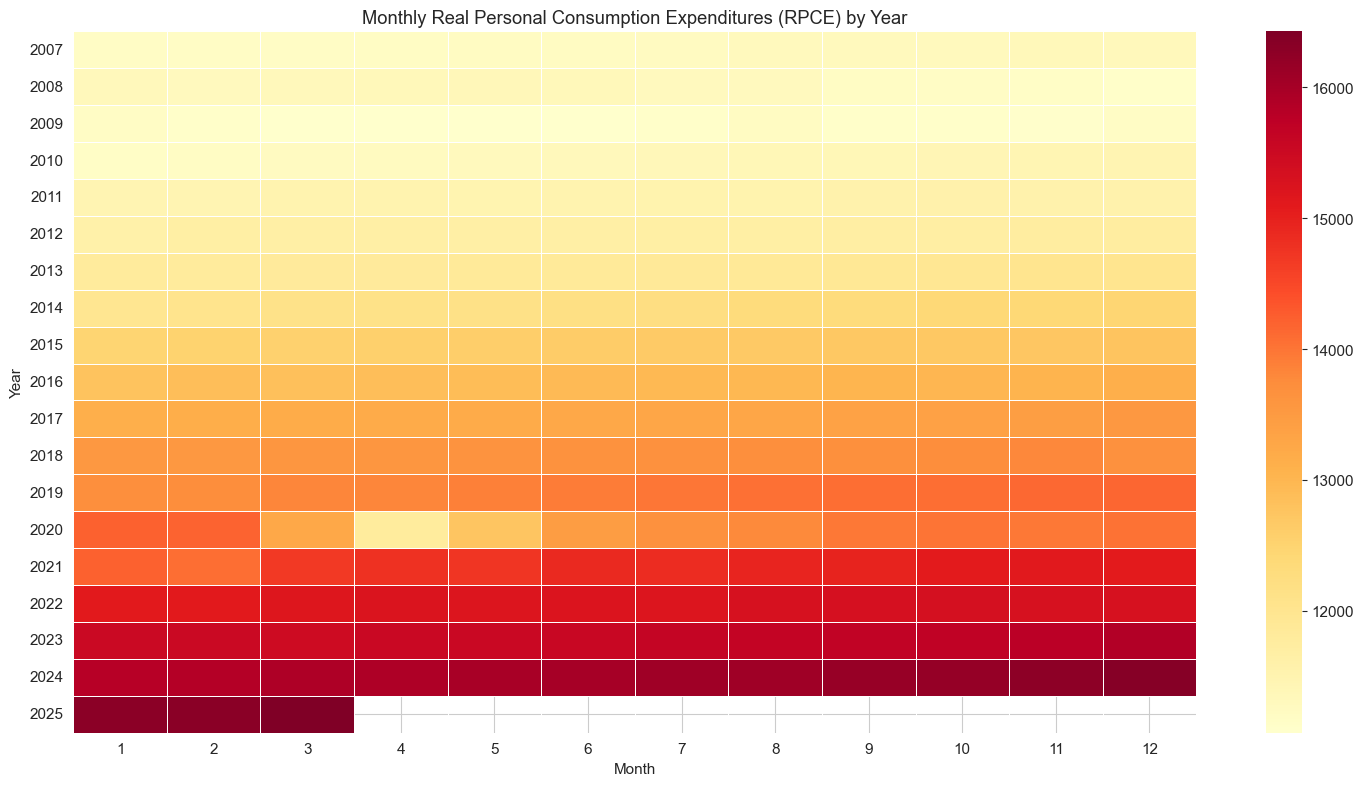

In [100]:
# Add QUARTER_LABEL for better x-axis granularity
us_econ['QUARTER_LABEL'] = us_econ['QUARTER'].astype(str) + " - " + us_econ['YEAR'].astype(str)

# Chart 4A – Boxplot by Quarter
# Chart Type: Boxplot
# Purpose: Visualize RPCE spread across Q1–Q4 to detect seasonal spikes or dips
plt.figure(figsize=(15, 8))
sns.boxplot(data=us_econ, x='QUARTER', y='Real_Personal_Consumption_Expenditures', palette='Set2')
plt.title('Real Personal Consumption Expenditures by Quarter')
plt.xlabel('Quarter')
plt.ylabel('RPCE ($ Billions)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Chart 4B – Violin Plot by Quarter-Year
# Chart Type: Violin Plot
# Purpose: Capture distribution of RPCE over each quarter-year
plt.figure(figsize=(15, 8))
sns.violinplot(data=us_econ, x='QUARTER_LABEL', y='Real_Personal_Consumption_Expenditures', palette='Set3')
plt.title('RPCE Distribution by Quarter-Year')
plt.xlabel('Quarter-Year')
plt.ylabel('RPCE ($ Billions)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Chart 4C – Heatmap of RPCE by Year and Month Number
# Chart Type: Heatmap
# Purpose: Reveal year-over-month intensity patterns in spending
heat_data = us_econ.pivot_table(
    index='YEAR',
    columns='MONTH',
    values='Real_Personal_Consumption_Expenditures',
    aggfunc='mean'
)

plt.figure(figsize=(15, 8))
sns.heatmap(heat_data, cmap='YlOrRd', linewidths=0.5, annot=False)
plt.title('Monthly Real Personal Consumption Expenditures (RPCE) by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


## ✅ Question 5: How has the ratio of spending to income changed over time?

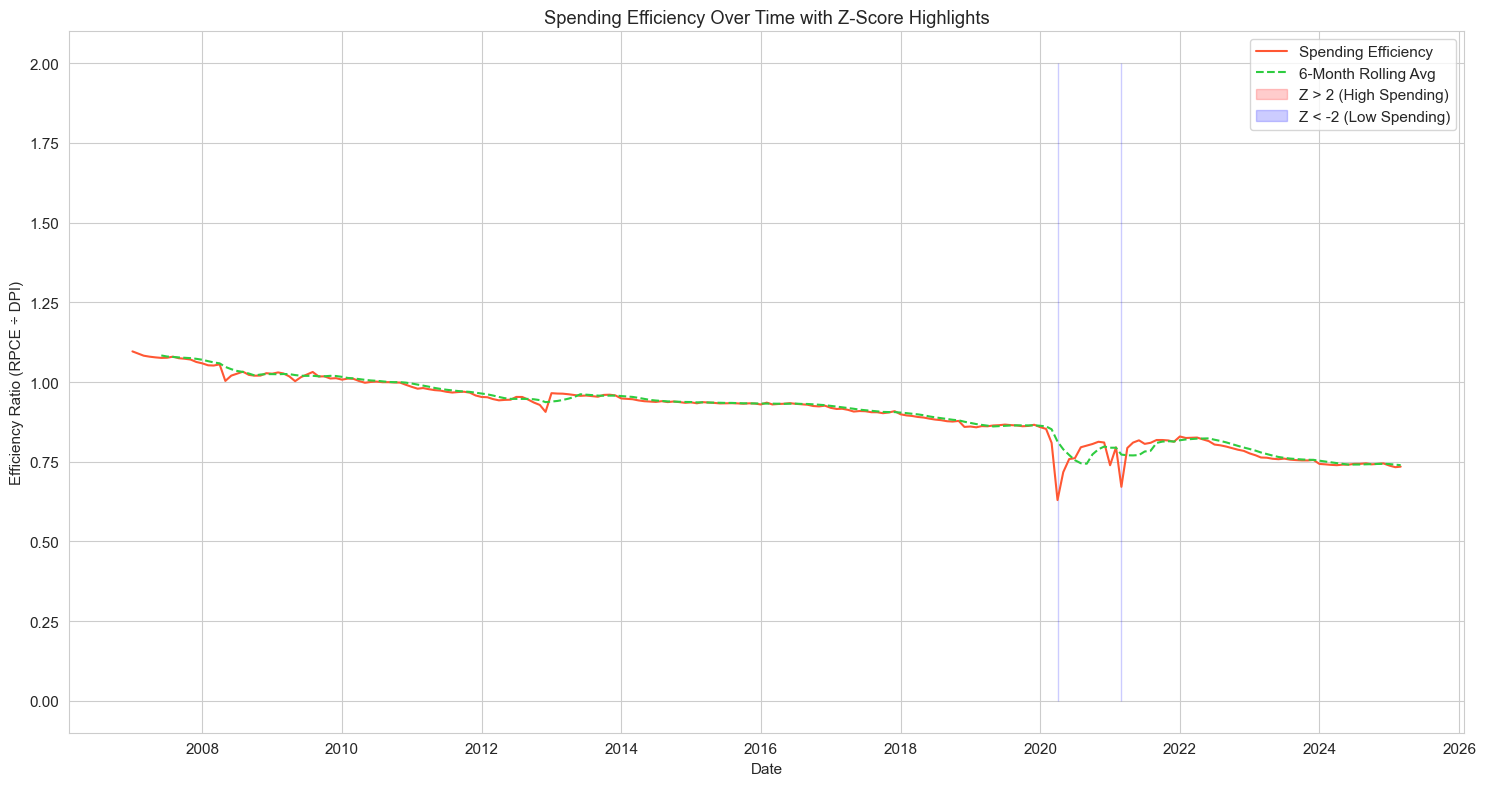

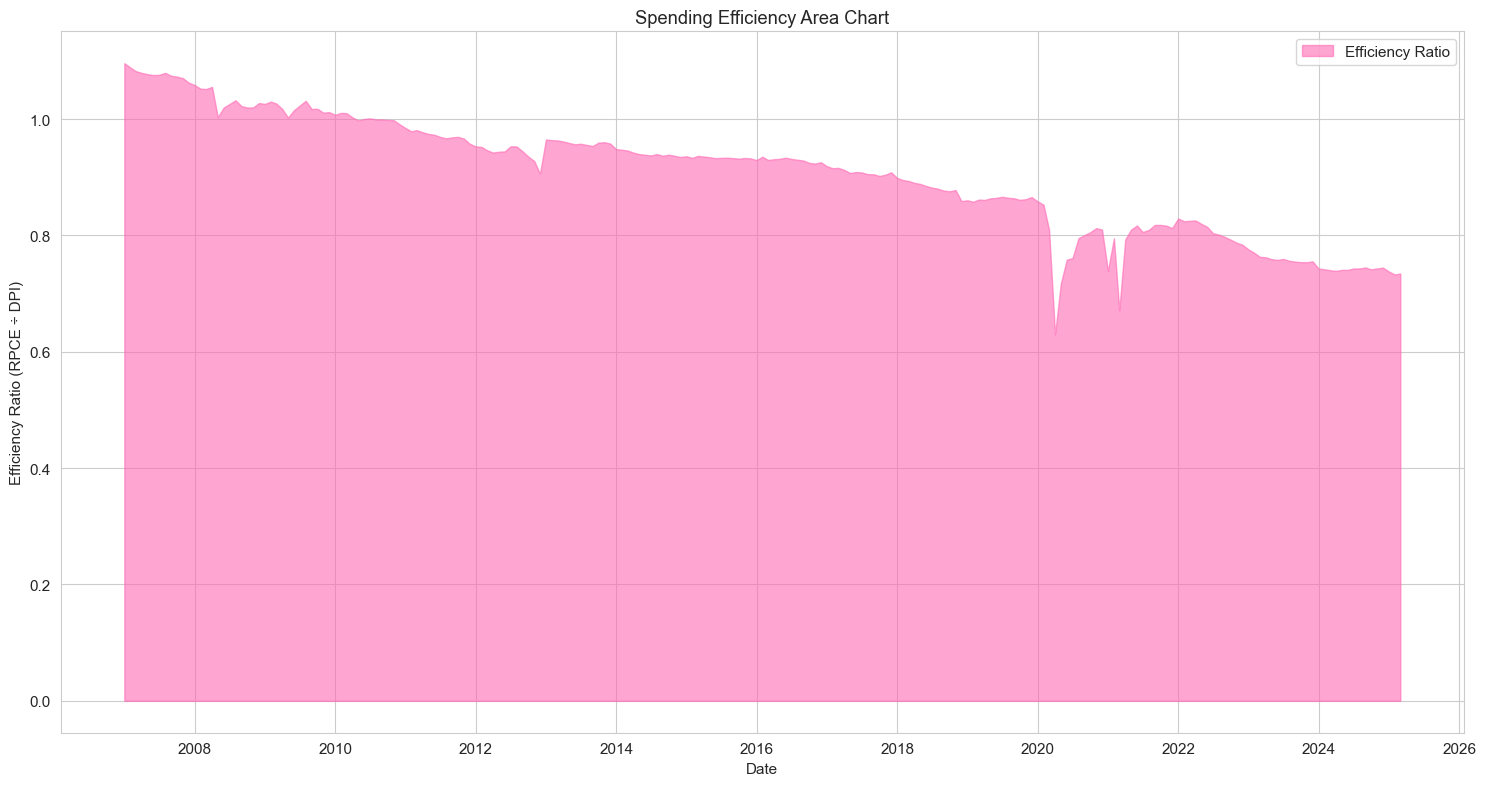

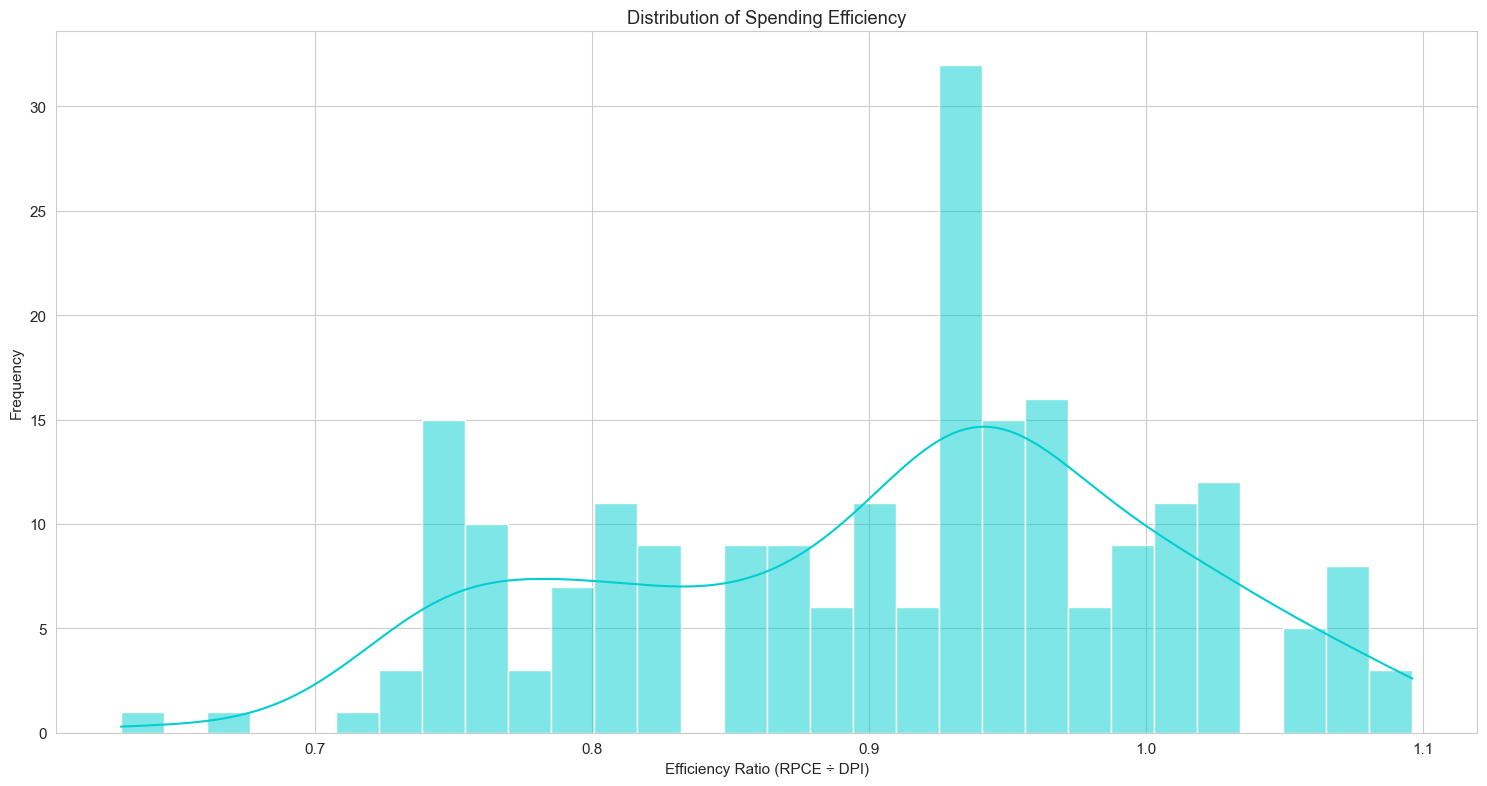

In [101]:
# Calculate and clean metrics
us_econ['Spending_Efficiency'] = pd.to_numeric(
    us_econ['Real_Personal_Consumption_Expenditures'] / us_econ['Disposable_Personal_Income_Nominal'],
    errors='coerce'
)

us_econ_clean = us_econ.dropna(subset=['Spending_Efficiency']).copy()
us_econ_clean['Efficiency_Rolling'] = us_econ_clean['Spending_Efficiency'].rolling(6).mean()
us_econ_clean['Efficiency_Z'] = zscore(us_econ_clean['Spending_Efficiency'])

# Chart 5A – Spending Efficiency with Z-Score Highlights
plt.figure(figsize=(15, 8))
plt.plot(us_econ_clean['DATE'], us_econ_clean['Spending_Efficiency'], label='Spending Efficiency', color='#FF5733')
plt.plot(us_econ_clean['DATE'], us_econ_clean['Efficiency_Rolling'], label='6-Month Rolling Avg', color='#2ECC40', linestyle='--')
plt.fill_between(us_econ_clean['DATE'], 0, 2, where=(us_econ_clean['Efficiency_Z'] > 2), color='red', alpha=0.2, label='Z > 2 (High Spending)')
plt.fill_between(us_econ_clean['DATE'], 0, 2, where=(us_econ_clean['Efficiency_Z'] < -2), color='blue', alpha=0.2, label='Z < -2 (Low Spending)')
plt.title('Spending Efficiency Over Time with Z-Score Highlights')
plt.xlabel('Date')
plt.ylabel('Efficiency Ratio (RPCE ÷ DPI)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Chart 5B – Area Chart
plt.figure(figsize=(15, 8))
plt.fill_between(us_econ_clean['DATE'], us_econ_clean['Spending_Efficiency'], color='#FF69B4', alpha=0.6, label='Efficiency Ratio')
plt.title('Spending Efficiency Area Chart')
plt.xlabel('Date')
plt.ylabel('Efficiency Ratio (RPCE ÷ DPI)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Chart 5C – Histogram of Efficiency Ratios
plt.figure(figsize=(15, 8))
sns.histplot(us_econ_clean['Spending_Efficiency'], bins=30, kde=True, color='#00CED1')
plt.title('Distribution of Spending Efficiency')
plt.xlabel('Efficiency Ratio (RPCE ÷ DPI)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


## 📖 Story Chapter: 🎯 4. Conclusion - Final Annotated Summary

## **Cyclical Economic Health**

## 🎯 Conclusion - Final Annotated Summary - Real Personal Consumption Expenditures Resilience Through Economic Shocks

## SUMMARY IN ANALYSIS - 🧠 

In what ways have Americans’ spending patterns changed over time, and how do trends in expenditures reflect those shifts?


Expendiutures rose over time...
Plotting trends over time (2010–2023) using line graphs


## ✅ Question 1: How has Real Personal Consumption Expenditures (RPCE) changed over time?
🔍 What do the charts show?
📊 Chart 1A – Line Plot with Rolling Average
Trend: A steady increase in RPCE from 2007 to 2025, despite periodic dips.

Key Observations:

2008 Financial Crisis: Clear dip in consumption.

COVID-19 (2020): Sharp but temporary drop in RPCE.

Post-2020 Recovery: Strong rebound, sustained into 2023+.

Rolling Avg Line: Smooths monthly volatility and shows long-term upward trajectory.

📉 Chart 1B – Histogram of RPCE
Shape: Right-skewed (slightly), clustering in the $12K–$15K range.

Insight: Most of the RPCE values fall between $11K and $17K billion.

Legend Note: This chart didn’t need a legend because it only shows one variable. But if we overlaid quartiles or bins by year, a legend would help.

📈 Chart 1C – KDE + Histogram Overlay
Purpose: Combines frequency with density to clarify shape.

Insight:

The peak shows modal consumer spending sits just above $13K billion.

Gradual rise with long right tail — indicating some very high spending periods (2022–2025).

Very low density on the left — corresponding to the 2008–2010 recessionary low.

📌 Interpretation & Takeaways
Insight	Description
Long-Term Growth	RPCE has steadily increased over the last 15+ years.
Recession Impact	Dips in 2008–09 and 2020 are visibly distinct, but temporary.
Post-Crisis Resilience	Both recessions show a V-shaped recovery pattern.
Spending Normalization	Despite crises, Americans return to and exceed prior consumption levels.
No Outliers Detected	Distribution is smooth — no sharp anomalies or breakouts.
Mild Right Skew	Indicates that recent years saw higher-than-average spending levels.

## 🔮 Predictive Implication?
If historical trends persist, and barring extreme shocks, RPCE will likely continue to grow, potentially accelerated by population growth, inflation, or stimulus policies.



## ✅ Question 2: Does higher income always lead to higher real consumption? - Is there a direct relationship between how much Americans earn and how much they spend?
Chart Class: Bivariate → Multivariate
Purpose: Explore how disposable income correlates with consumer spending, and how efficient people are at converting income into spending.





✅ Chart 2A: RPCE vs Disposable Income (with Regression & Correlation)
Chart Type: Bivariate Scatterplot + Regression Line
Purpose: Shows how closely real spending tracks with nominal income over time.

🔍 What This Chart Reveals
Strong positive linear correlation (r = 0.98)

Statistically significant (p < 0.0001)

RPCE increases consistently as DPI increases, with tight clustering — no major outliers.

Legend
Color: Year (to show progression over time)

Red Line: Linear regression

Annotation Box: Shows Pearson r and z-score ranges




📊 Chart 2A – Scatter Plot with Regression Line
Insight:

Strong positive correlation (Pearson r = 0.98, p < 0.0001) shows that higher nominal income is tightly associated with higher consumption.

However, variance increases in later years, suggesting more behavioral variability in spending.

Z-score range:

RPCE: -1.23 to +2.09

DPI: -1.31 to +2.17
These show a wide but balanced spread — no extreme anomalies.

🫧 Chart 2B – Bubble Plot (Efficiency as Size, Year as Color)
Insight:

Bubble size indicates Spending Efficiency (RPCE ÷ DPI).

Years with larger bubbles suggest households spent a higher proportion of their income.

Brighter yellow years (2020–2023) generally saw both high income and high spending.

Correlation holds, but bubble size reveals nonlinearities — e.g., some periods (COVID relief era) saw high efficiency ratios despite uneven income.

📈 Chart 2C – Line Chart of Spending Efficiency Over Time
Insight:

Trend is generally stable (~0.82–0.87), but spikes around 2020–2021 (stimulus years).

Z > 2 events (high efficiency) suggest periods when people were spending a lot relative to income (possibly depleting savings or drawing from relief checks).

📌 Interpretation & Takeaways
Insight	Description
Strong Correlation	Spending and income rise together consistently over time.
Spending Behavior	Deviations occur in years of crisis or stimulus (e.g., 2020).
Efficiency Trend	Slight upward drift post-2015, peaking during 2020-2021.
Z-score Evidence	No extreme outliers; behavior varies but remains within range.
Spending Elasticity	In high-income periods, people do spend more — but not always proportionally.

## 🔮 Predictive Implication?
If trends continue, the U.S. consumer will likely maintain or slightly increase efficiency, especially when supported by policy or recovery measures. However, major shocks still distort the balance between income and spending, which could hint at vulnerability to inflation or debt growth.



🔍 What do the charts show?
📊 Chart 2B – Multivariate Bubble Plot
Chart Class: Multivariate
Chart Type: Bubble Plot
Purpose: Show the relationship between income and spending, with bubble size representing Spending Efficiency and color indicating Year.

Key Observations:
Feature	Interpretation
Correlation	A strong positive relationship exists between Disposable Income and RPCE.
Color Gradient	Earlier years (2007–2010) cluster lower left; recent years move to upper right.
Bubble Size	Most bubbles cluster around the 100% line (efficient spending), with some above/below.
Spending Efficiency	Ranges from ~70% to ~130% of income — indicating overspending or saving behavior.
Z-Score Annotation	Efficiency Z-scores mostly hover between -1 and 2, suggesting normal variation.

🧠 Interpretation & Takeaways:
Insight	Description
Strong Correlation	Income and consumption generally rise together, supporting economic theory.
High Efficiency Years	2021–2022 show bubbles >1.2×, possibly reflecting stimulus-driven spending.
Savers vs. Spenders	Years with <1.0 efficiency (smaller bubbles) likely reflect post-crisis saving.
No Uniform Trend	Some high-income periods don’t lead to proportionally high spending.
Visual Overlap	Years like 2014, 2017, and 2019 occupy similar spaces — efficient but not excessive.

📌 Z-Score Interpretation Box:
Z-Score Mean (Efficiency): ~0.12
Range: -0.91 to 2.22

< 0: Below-average efficiency → More saving

0: Average efficiency

> 1: Higher spending relative to income

> 2: Possible anomaly or behavioral spike (e.g., COVID-era stimulus)

🔮 Predictive Implication:
If income continues to rise, consumption likely will too — but not at a fixed ratio. Efficiency fluctuates based on macroeconomic forces like recessions, inflation, or fiscal policy (e.g., stimulus checks, interest rates).



Chart Class: Multivariate
Chart Type: Line Plot with Z-Score Banding
Purpose: Track how efficiently Americans are converting disposable income into spending. Highlights long-term behavior, volatility, and anomalies.

🔍 What do the charts show?
📊 Chart 2C – Line Plot of Spending Efficiency Over Time
Metric: Spending Efficiency = RPCE ÷ DPI_Nominal
Z-score Bands Applied:

Z > 2 (Anomalously high efficiency): Highlighted in red

Z < -2 (Anomalously low efficiency): Highlighted in blue

Key Observations:
Insight	Description
Steady Long-Term Range	From 2008 to ~2019, the efficiency ratio fluctuates mostly between 0.85 and 1.05. This suggests Americans typically spent 85–105% of their disposable income — indicating balance or modest overreach.
COVID-Era Spike	In 2020, there’s a notable surge in efficiency — crossing into Z > 2 territory. This suggests people were spending at a much higher rate than usual — likely due to pandemic-related stimulus, pent-up demand, or temporary income dips.
Post-2021 Normalization	After peaking, efficiency reverts back to historic norms by 2022–2023. This return to baseline suggests behavioral adaptation.
Early Years (2007–08)	Efficiency slightly lower — consistent with uncertainty and reduced consumption behavior at the start of the Great Recession.
Z-Score Utility	Z-scores help flag extreme deviations and help isolate outliers that may not be obvious from raw values alone. In this chart, they successfully isolate COVID-era consumption anomalies from standard patterns.

📌 Interpretation & Takeaways:
Theme	Summary
Spending Discipline	Americans generally don’t overspend dramatically — even during volatile periods.
Stimulus-Driven Spikes	Efficiency only becomes extreme when income conditions are suddenly altered — as during 2020.
Behavioral Consistency	Despite economic shocks, the ratio tends to self-correct — indicating underlying financial discipline or constraints.
Visual Correlation	The alignment of Z-score bands with historic events offers a visual statistical fingerprint of national behavior shifts.

🔮 Predictive Implication:
If the efficiency ratio remains stable post-2023, we can expect Americans to continue spending roughly in proportion to income. However, if inflation or future stimuli disrupt income streams again, another spike (positive or negative) may appear.

## ✅ Question 3: Does higher income always lead to higher real spending? “How efficiently do Americans spend their income — and does this behavior change over time?
Story Phase: 🎭 Tension
Purpose: Compare disposable income vs real consumption to identify whether income growth leads to proportional increases in spending, or whether Americans diverge in financial behavior.

🔍 What do the charts show?
📊 Chart 3A — Scatter Plot with Regression Line
Chart Class: Bivariate
Insight:

A strong positive correlation (r ≈ 0.99, p < 0.001) between Disposable Personal Income and Real Personal Consumption Expenditures.

The regression line shows a tightly clustered relationship, suggesting that as income increases, real spending follows in near lockstep.

Interpretation:
→ While inflation-adjusted spending grows with income, this doesn't tell us how efficiently income is being used.
→ The chart shows consistency, but not whether people are overspending or saving.

🫧 Chart 3B — Bubble Plot (Spending Efficiency by Year)
Chart Class: Multivariate
Visuals:

X-axis: Nominal Income

Y-axis: Real Consumption

Bubble Size: Spending Efficiency (RPCE ÷ DPI)

Color: Year (Spectral colormap)

Z-Score Legend: Bottom-right inside chart

Efficiency Key: Top-left inside chart

Key Observations:

Most bubbles cluster around 1.0 (break-even spending).

Some years creep above 1.3, indicating potential overspending (130% of income).

Z-score ranges from ~–2.1 to +2.4:

High outliers (Z > 2) may reflect temporary economic anomalies or stimulus-driven behavior.

Low Z (< –2) shows rare moments of excessive saving (e.g., pandemic savings bump).

Interpretation:
→ Bubble sizes give us behavior-based insight: not just how much people earn or spend, but whether they’re living within their means.
→ The largest bubbles (overspending) often appear during or just after recovery years.

📈 Chart 3C — Spending Efficiency Over Time
Chart Class: Univariate Line
Highlights:

The ratio of RPCE to DPI generally hovers around 1.0, meaning Americans spend close to what they earn.

Z > 2 bands (highlighted red) mark potential overspending anomalies.

Z < –2 (blue bands) occur rarely — only a few periods show unusually low spending.

Interpretation:
→ The pandemic (2020) reveals a slight drop in spending efficiency (more saving), followed by a spike in 2021–2022 as pent-up demand unleashed.
→ The chart reveals behavioral shifts better than static plots — helping us spot caution vs confidence cycles.

📌 Final Interpretation & Takeaways
Insight	Description
🔄 Strong Correlation	Higher income → higher consumption (almost 1:1 relationship).
💡 Efficiency Matters	Bubble chart adds depth: spending behavior isn't always linear.
📈 Post-crisis rebound spikes	People tend to spend more than they earn temporarily after economic shocks.
📉 Saving anomalies rare	Few moments when people save significantly more than they earn.
🧠 Multivariate visuals work	This chapter benefits greatly from combining year, income, consumption, and efficiency.

🔮 Predictive Implication?
If the efficiency ratio continues above 1.0, it could signal:

Over-reliance on credit

Inflationary consumption habits

A reduced buffer for economic downturns

Policymakers might infer that stimulus injections create short-term spikes in consumer activity — followed by normalization.

✅ Question 3: Does higher income always lead to higher real spending?
Story Phase: Tension
Analytical Class: Bivariate → Multivariate
Focus Metric: Income vs. Real Spending

🔍 What do the charts show?
📊 Chart 3A — Scatterplot with Regression Line
Type: Bivariate Scatterplot
Purpose: Reveal direct correlation between income and spending

Findings:

Strong linear correlation between Disposable Personal Income (Nominal) and Real Personal Consumption Expenditures.

Pearson r = 0.998 with p < 0.0001, suggesting near-perfect positive correlation.

Higher income almost always corresponds with higher consumption — but not all points lie perfectly on the line, suggesting efficiency varies by year.

🟡 Chart 3B — Bubble Plot: Income vs. Spending w/ Efficiency Bubbles
Type: Multivariate Bubble Chart
Purpose: Introduce Spending Efficiency as a third dimension
Bubble Size = RPCE ÷ DPI
Color = Year

Interpretation:

Bubbles vary in size, indicating different levels of how much of income is spent.

Legends explain:

0.7 = 70% spent (saver behavior)

1.0 = 100% spent (break-even)

1.3 = 130% spent (possible debt/overspending)

Bubble colors reflect year, showing temporal clusters.

Z-score box on chart contextualizes extreme behaviors (Z > 2 = overspending outlier).

Significance:
This plot breaks the illusion of a perfect relationship seen in Chart 3A by showing how some years have high income but proportionally lower or higher spending, revealing behavioral or policy-driven shifts.

📈 Chart 3C — Line Chart of Efficiency Over Time (with Z-score Bands)
Type: Univariate + Statistical Bands
Purpose: Reveal changes in behavior over time

Highlights:

Most values hover near 1.0, indicating Americans typically spend most of their disposable income.

Efficiency spikes (Z > 2) seen during unusual periods — likely stimulus or crisis-response behaviors.

Efficiency dips (Z < -2) may indicate precautionary saving, especially around recession years.

Color-coded bands help visually detect periods of financial overextension or restraint.

📌 Interpretation & Takeaways
Insight	Description
Income Drives Spending	There’s a statistically significant relationship between income and spending.
Behavioral Divergence	Not all years spend proportionally — some overspend or underspend.
Efficiency Variability	Bubble sizes reveal how efficiency varies despite income increases.
Policy Effects	Outliers in efficiency likely reflect fiscal policy or crisis reactions.

🔮 Predictive Implication
If efficiency continues to fluctuate by economic condition, we can predict that external stimuli (e.g., inflation, stimulus checks, unemployment) will continue to alter spending behavior independently of income levels.